# A hands-on experience of Scikit-learn 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#create-a-Test-set" data-toc-modified-id="create-a-Test-set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>create a Test set</a></span><ul class="toc-item"><li><span><a href="#hash-the-existing-test-data" data-toc-modified-id="hash-the-existing-test-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>hash the existing test data</a></span></li></ul></li><li><span><a href="#from-sklearn.model_selection-import-train_test_split" data-toc-modified-id="from-sklearn.model_selection-import-train_test_split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>from sklearn.model_selection import train_test_split</a></span></li><li><span><a href="#stratified-categories" data-toc-modified-id="stratified-categories-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>stratified categories</a></span></li><li><span><a href="#fill-up-the-missing-value-with-median---Imputer" data-toc-modified-id="fill-up-the-missing-value-with-median---Imputer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>fill up the missing value with median - Imputer</a></span></li><li><span><a href="#construct-new-features---Self-defined-Transfomer" data-toc-modified-id="construct-new-features---Self-defined-Transfomer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>construct new features - Self-defined Transfomer</a></span></li><li><span><a href="#DataFrame-Selector" data-toc-modified-id="DataFrame-Selector-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>DataFrame Selector</a></span></li><li><span><a href="#pipe-version-LabelBinarizer" data-toc-modified-id="pipe-version-LabelBinarizer-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>pipe version LabelBinarizer</a></span></li><li><span><a href="#FeatureUnion" data-toc-modified-id="FeatureUnion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>FeatureUnion</a></span></li></ul></div>

In [97]:
import os
import tarfile
from six.moves import urllib

In [98]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [99]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [100]:
fetch_housing_data()

In [101]:
import pandas as pd

In [102]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [103]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [104]:
housing.info()
# total_bedrooms has missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [105]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [106]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [107]:
%matplotlib inline

In [108]:
import matplotlib.pyplot as plt

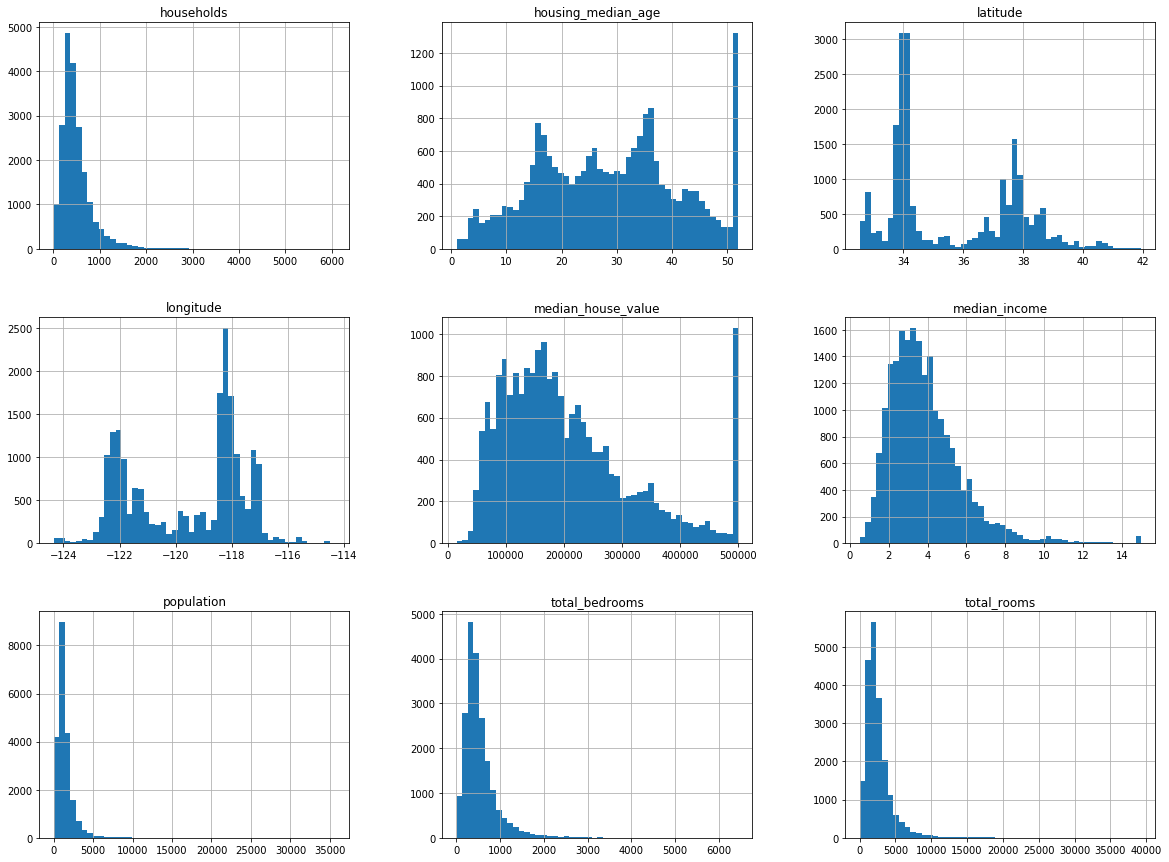

In [109]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## create a Test set

In [110]:
import numpy as np

In [111]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [112]:
train_set, test_set = split_train_test(housing,test_ratio=0.2)

In [113]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


### hash the existing test data

In [114]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [115]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
len(test_set)

4278

## from sklearn.model_selection import train_test_split


In [116]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [117]:
len(test_set)

4128

## stratified categories

In [118]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [119]:
max(housing["median_income"])
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [120]:
max(housing["income_cat"])

5.0

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [122]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [123]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [124]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [125]:
# remove income_cat attribute so the data is back to its original state
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

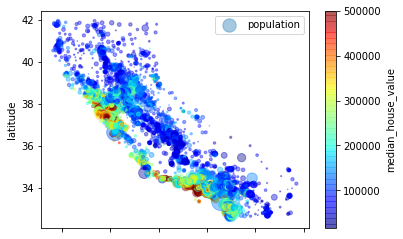

In [126]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population",c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [129]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

KeyError: 'median_house_value'

In [130]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [131]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [132]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## fill up the missing value with median - Imputer

In [133]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
# the median can only be computed on numerical attributes,
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [134]:
imputer.statistics_
# apply
X = imputer.transform(housing_num)
# new dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## construct new features - Self-defined Transfomer

In [135]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [136]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Pipeline & StandardScaler

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

## DataFrame Selector

In [138]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


## pipe version LabelBinarizer

In [139]:
class LabelBinarizerPipe(BaseEstimator, TransformerMixin):
    def __init__(self,sparse_output=True):
        self.sparse_output = sparse_output

    
    def fit(self, X, y=None):
        self.encoder = LabelBinarizer(sparse_output=self.sparse_output)
        self.encoder.fit(X)
        return self
    
    def transform(self, X, y=None):
        result = self.encoder.transform(X)
        return result

## FeatureUnion

In [140]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', LabelBinarizerPipe()),
])
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [151]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

# LinearRegression

In [152]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [154]:
some_data_prepared = full_pipeline.transform(some_data)

In [155]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [ 210644.60465172  317768.80712827  210956.4332437    59218.98859509
  189747.55851241]


In [156]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [159]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

# DesicionTreeRegression

In [160]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [166]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [167]:
tree_reg.feature_importances_

array([  6.76658472e-02,   5.55343419e-02,   4.06405816e-02,
         1.34172128e-02,   1.14895099e-02,   8.72262289e-03,
         1.18857809e-02,   4.72567719e-01,   2.78091157e-02,
         1.23090471e-01,   2.40783496e-02,   9.54923901e-04,
         1.40202998e-01,   2.02276657e-04,   4.05163404e-04,
         1.33308569e-03])

# Cross-validation

In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [163]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [164]:
display_scores(rmse_scores)

Scores: [ 69391.76466229  65653.85736458  72098.03055374  68994.62626509
  72201.54038247  74016.28517856  70112.59413607  71104.3634103
  76941.6918142   70450.99534806]
Mean: 71096.5749115
Standard deviation: 2885.25135714
